In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Exploratory Precipitation Analysis

# Find the most recent date in the data set.
last_date=session.query(measurement.date)[-1][0]
last_date

prev_year=dt.datetime.strptime(last_date, "%Y-%m-%d").date()-dt.timedelta(365)

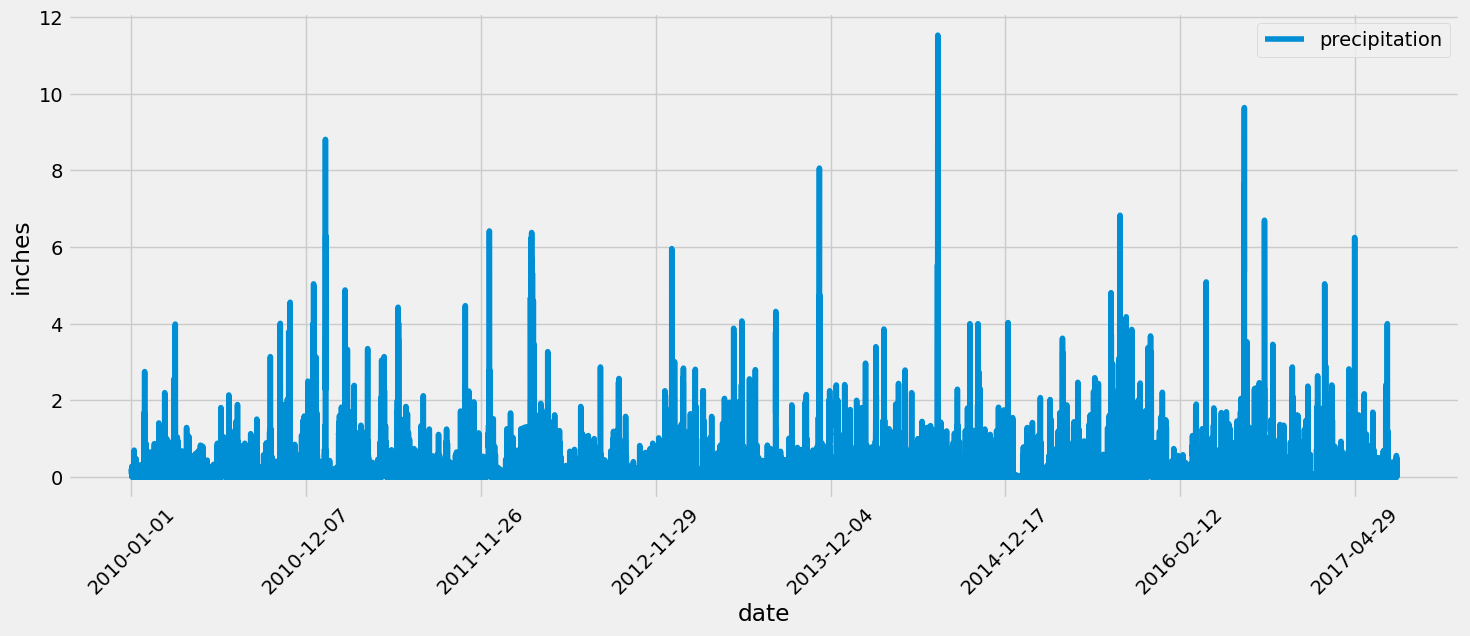

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
prev_year=dt.datetime.strptime(last_date, "%Y-%m-%d").date()-dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
result = session.query(measurement.date, measurement.prcp).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df=pd.DataFrame(result,columns=["date","precipitation"])

# Sort the dataframe by date
df= df.sort_values("date").dropna()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="date",y="precipitation",figsize=(16,6),ylabel="inches",rot=45)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [43]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station,func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),
             func.max(measurement.tobs),
             func.avg(measurement.tobs)).filter(measurement.station=="USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

array([[<Axes: title={'center': 'tobs'}>]], dtype=object)

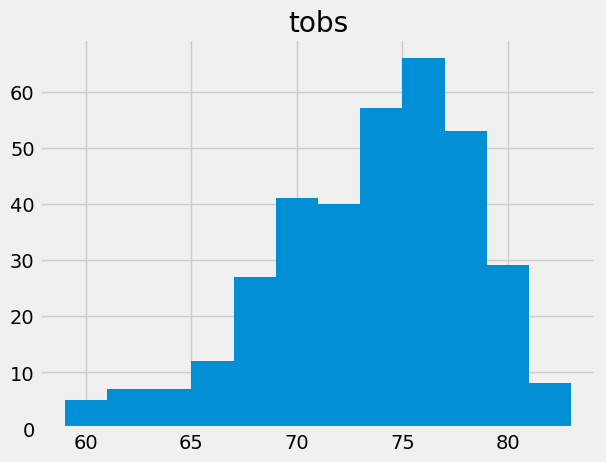

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result=session.query(measurement.tobs).filter(measurement.station=="USC00519281", measurement.date>="2016-08-23").all()
pd.DataFrame(result).hist(bins=12)

# Close Session

In [16]:
# Close Session
session.close()